In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo 

import pandas as pd
# import piplite
# await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score
from statistics import stdev, mean
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
features = breast_cancer_wisconsin_diagnostic.data.features 
targets = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [13]:
# Extract the regressors and the target from the data frame
x, y = features.iloc[:,:].to_numpy(), targets.iloc[:,0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
# print(X_train.shape)
# print(X_test.shape)

model = make_pipeline(StandardScaler(), LogisticRegression(solver='newton-cg', random_state=0)).fit(X_train, y_train)
ypred_train = model.predict(X_train)
cfm = confusion_matrix(y_train, ypred_train)

print(f"Training accuracy = {model.score(X_train, y_train)}")
print()

ypred = model.predict(X_test)
cfm_test = confusion_matrix(y_test, ypred)

print(f"Testing accuracy = {model.score(X_test, y_test)}")
logreg = model.named_steps['logisticregression'] # used chatgpt to obtain coefficients of logistic regression
# print(f"Coefficients: ", logreg.intercept_, logreg.coef_)
print()

order = abs(np.array(logreg.coef_)).argsort()
selected_columns = features.columns[order[0]]
print(f"Last values are most important: {selected_columns}")
# used chatgpt to show largest coefficients

Training accuracy = 0.9949748743718593

Testing accuracy = 0.9532163742690059

Last values are most important: Index(['compactness1', 'concavity2', 'fractal_dimension1', 'compactness3',
       'texture2', 'symmetry1', 'concave_points2', 'smoothness2', 'symmetry2',
       'fractal_dimension3', 'smoothness1', 'perimeter1', 'area1', 'radius1',
       'texture1', 'concavity1', 'fractal_dimension2', 'texture3',
       'concavity3', 'area2', 'concave_points3', 'smoothness3', 'area3',
       'perimeter3', 'perimeter2', 'compactness2', 'symmetry3',
       'concave_points1', 'radius3', 'radius2'],
      dtype='object')


# [20 pts] Split the samples into 70% Training and 30% Testing at random. Make sure to use “stratify=y” in the test_train_split function. Build a pipeline using the Standard scaler and logistic regression. Use the default penalty settings of Logistic Regression. After fitting the data, what is the model’s training and testing accuracy? Which features are most important?

    Training accuracy = 0.9949748743718593
    Testing accuracy = 0.9532163742690059

This array contains the features arranged from least to most important:

    ['compactness1', 'concavity2', 'fractal_dimension1', 'compactness3',
       'texture2', 'symmetry1', 'concave_points2', 'smoothness2', 'symmetry2',
       'fractal_dimension3', 'smoothness1', 'perimeter1', 'area1', 'radius1',
       'texture1', 'concavity1', 'fractal_dimension2', 'texture3',
       'concavity3', 'area2', 'concave_points3', 'smoothness3', 'area3',
       'perimeter3', 'perimeter2', 'compactness2', 'symmetry3',
       'concave_points1', 'radius3', 'radius2']

The top 5 features are: 

    ['compactness2', 'symmetry3', 'concave_points1', 'radius3', 'radius2']

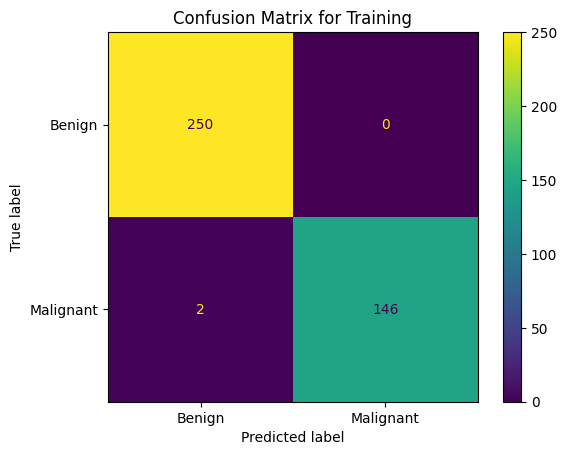

Training F1 Score: 0.9931972789115646
Training Precision Score: 1.0
Training Recall Score: 0.9864864864864865
False Alarm Rate: 0.0


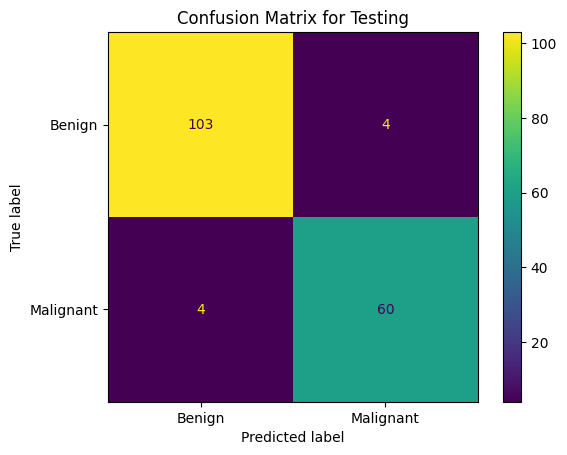

Testing F1 Score: 0.9375
Testing Precision Score: 0.9375
Testing Recall Score: 0.9375
False Alarm Rate: 0.03738317757009346


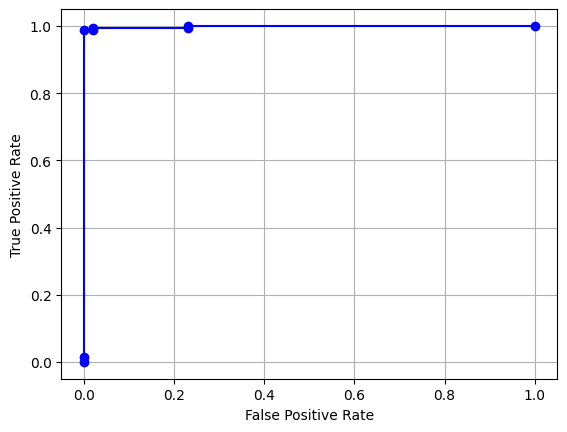

AUC of training set:  0.9982972972972973


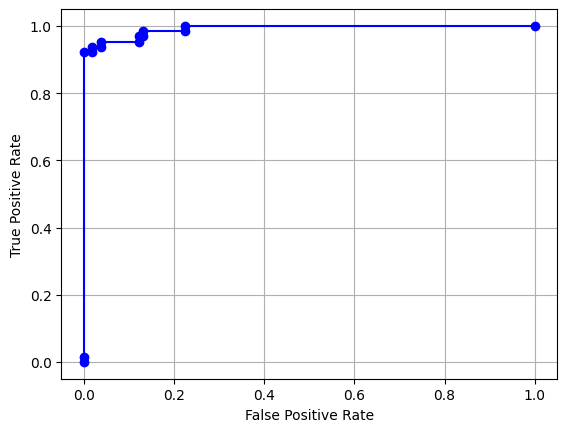

AUC of testing set:  0.9916764018691588


In [14]:
from sklearn import metrics

cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Training')
plt.show()

training_f1_score = f1_score(y_train, ypred_train, pos_label='M')
training_precision_score = precision_score(y_train, ypred_train, pos_label='M')
training_recall_score = recall_score(y_train, ypred_train, pos_label='M')
print(f"Training F1 Score: {training_f1_score}")
print(f"Training Precision Score: {training_precision_score}")
print(f"Training Recall Score: {training_recall_score}")
print(f"False Alarm Rate: {1 - (cfm[0][0] / (cfm[0][0] + cfm[0][1]))}")

cm_test_display = ConfusionMatrixDisplay(confusion_matrix = cfm_test, display_labels = ["Benign", "Malignant"])
cm_test_display.plot()
plt.title('Confusion Matrix for Testing')
plt.show()

testing_f1_score = f1_score(y_test, ypred, pos_label='M')
testing_precision_score = precision_score(y_test, ypred, pos_label='M')
testing_recall_score = recall_score(y_test, ypred, pos_label='M')
print(f"Testing F1 Score: {testing_f1_score}")
print(f"Testing Precision Score: {testing_precision_score}")
print(f"Testing Recall Score: {testing_recall_score}")
print(f"False Alarm Rate: {1 - (cfm_test[0][0] / (cfm_test[0][0] + cfm_test[0][1]))}")

y2 = model.predict_proba(X_train)
# Use the binary labels for the training set
y_train_bin = (y_train == 'M').astype(int)

fpr, tpr, thresholds = metrics.roc_curve(y_train_bin, y2[:,1])
plt.plot(fpr, tpr, 'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()
print(f"AUC of training set: ", metrics.roc_auc_score(y_train_bin, y2[:,1]))

from sklearn import metrics

# Use the predicted probabilities for the positive class (Malignant, 'M')
y2_test = model.predict_proba(X_test)

y_test_bin = (y_test == 'M').astype(int)

fpr, tpr, thresholds = metrics.roc_curve(y_test_bin, y2_test[:, 1])
plt.plot(fpr, tpr, 'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()
print(f"AUC of testing set: ", metrics.roc_auc_score(y_test_bin, y2_test[:, 1]))

# [20 pts] From your answer in item (a), generate a confusion matrix, then calculate the other metrics: F1-score, Precision, Recall, and False alarm rate. Finally, plot the ROC curve and report the AUC. For this item, make a result for both the training and testing data, separately.

    Training F1 Score: 0.9931972789115646
    Training Precision Score: 1.0
    Training Recall Score: 0.9864864864864865
    False Alarm Rate: 0.0

    Testing F1 Score: 0.9375
    Testing Precision Score: 0.9375
    Testing Recall Score: 0.9375
    False Alarm Rate: 0.03738317757009346

    AUC of training set:  0.9982972972972973
    AUC of testing set:  0.9916764018691588

# Based on your results for this Problem, what insights did you gain?

The training set has a false alarm rate of 0, whereas the testing set has a false alarm rate of around 3.74%. The false alarm rate indicates how many negatives were wrongly predicted as positive. This, then, holds up and is consistent with our understanding that, given the data split of 70% training and 30% testing, the results from training would be better due to larger data and better familiarity with the model, whereas the results from testing would be slightly lower. However, this aims to show how the model holds up to this batch of test data.

Similar to our answers in Part I, we were able to observe a trend between the training and test results, with the training scores (F1 Score: 99.32%) being higher than the test scores (F1 Score: 93.75%). This also reflects in the AUC of our training and testing sets with 99.83% and 99.17% respectively, with the AUC for training being only slightly higher. The ROC curve and AUC of both the training and test data mean that the classifier has a really high chance of classifying a malignant entry as malignant due to the high TPR.

# AI Use Declaration

We declare that we used the following AI tools for the following purposes, but no AI was used in directly
solving the problem by entering the problem statement or any part thereof into any AI tool.

ChatGPT for generating sorting the largest model coefficients and obtaining the linear regresison coefficients.
Github Copilot for debugging syntax errors.